In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *
from sklearn.naive_bayes import *
from sklearn.tree import *
from sklearn.model_selection import *
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

df = pd.read_csv('data.csv', header = 0)
df = df.drop(['id'], axis=1)
diagnosis = df['diagnosis']
df['catNB'] = pd.factorize(df['diagnosis'].values)[0]
dfLabels = df['catNB'] 
labels = ['M', "B"]

features = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean'] # Features I will use 

bestAccuracy = 0.0
bestParams = None
bestCombination = []
bestDF = None
bestModel = None

k = 10 # Number of splits
maxRange = [[1, 1, 1, 1, 1]]

def rSubset(arr, r): 
    # return list of all subsets of length r 
    # to deal with duplicate subsets use  
    # set(list(combinations(arr, r))) 
    return list(combinations(arr, r)) 

Non-Poly Kernel Tests:

In [3]:
for nNumberOfFeatures in range(2, len(features)+1):
    possibleCombinations = rSubset(features, nNumberOfFeatures) # Creates complete list of all combinations of
    for combination in possibleCombinations:
        currentDF = pd.DataFrame()
        i = 0
        for feature in combination:
            currentDF.insert(i, feature, df[feature].to_list(), True)
            i += 1

        x = currentDF
        y = dfLabels

        clf0 = GaussianNB()
        clf1 = DecisionTreeClassifier(random_state = 0, criterion = 'gini', max_depth=2)
        clf2 = KNeighborsClassifier(n_neighbors=7, weights= 'uniform', p=2)
        clf3 = SVC(C=100, gamma='scale', kernel='rbf', probability=True)
        clf4 = SVC(C=100, kernel='poly', degree=4, probability=True)

        model = VotingClassifier(estimators=[ ('gnb', clf0), ('dt', clf1), ('knn', clf2),
                                    ('svc', clf3), ('svc2', clf4)])

    
        # Set up the grid of parameters 
        hyperParams = { 'voting' : ['soft', 'hard'],
                       'weights' : maxRange }
        # Train the model in the grid search
        kFolds = StratifiedKFold(n_splits = k, shuffle = True, random_state = 0)
        search = GridSearchCV(model, hyperParams, cv = kFolds, scoring = 'accuracy')
        search = search.fit(x, y)
        # Show some of the results using a dataframe
        dfResults = pd.DataFrame(search.cv_results_)
        results = dfResults[['param_voting', 'param_weights', \
                    'mean_test_score', 'std_test_score']]
        model = search.best_estimator_
        # print(search.best_params_)

        kFolds = StratifiedKFold(n_splits = k, shuffle = True, random_state = 0)
        scores = cross_val_score(model, x, y, cv = kFolds)
        predicted = cross_val_predict(model, x, y, cv = kFolds)
        accuracy = scores.mean()
        confusion = confusion_matrix(y, predicted)
        confDF = pd.DataFrame(confusion)
        confDF.columns = labels
        confDF.index = labels

        print("Accuracy with", combination, ":", accuracy)
        print("Params:", search.best_params_, '\n')

        if accuracy > bestAccuracy:
            bestAccuracy = accuracy
            bestCombination = combination
            bestDF = currentDF
            bestParams = search.best_params_
            bestModel = model

            confusion = np.zeros((2,2))
            scores = cross_val_score(bestModel, x, y, cv = kFolds)
            predicted = cross_val_predict(bestModel, x, y, cv = kFolds)
            accuracy = scores.mean()
            confusion = confusion_matrix(y, predicted)
            confDF = pd.DataFrame(confusion)
            confDF.columns = labels
            confDF.index = labels

            fig, ax = plt.subplots() # figsize=(6,10)
            plt.title('Confusion matrix with best accuracy with Voting Classifier')
            ax = sns.heatmap(confDF, annot = True, square=True, linewidth=3)
            fig.savefig('Best Heatmap VC Uniform.png')
            plt.close()

Accuracy with ('radius_mean', 'perimeter_mean') : 0.8822994987468672
Params: {'voting': 'soft', 'weights': [1, 1, 1, 1, 1]} 

Accuracy with ('radius_mean', 'area_mean') : 0.892888471177945
Params: {'voting': 'soft', 'weights': [1, 1, 1, 1, 1]} 

Accuracy with ('radius_mean', 'compactness_mean') : 0.8963659147869674
Params: {'voting': 'soft', 'weights': [1, 1, 1, 1, 1]} 

Accuracy with ('radius_mean', 'concavity_mean') : 0.9139097744360901
Params: {'voting': 'hard', 'weights': [1, 1, 1, 1, 1]} 

Accuracy with ('radius_mean', 'concave points_mean') : 0.8980889724310778
Params: {'voting': 'soft', 'weights': [1, 1, 1, 1, 1]} 

Accuracy with ('perimeter_mean', 'area_mean') : 0.8893796992481203
Params: {'voting': 'hard', 'weights': [1, 1, 1, 1, 1]} 

Accuracy with ('perimeter_mean', 'compactness_mean') : 0.8911027568922305
Params: {'voting': 'soft', 'weights': [1, 1, 1, 1, 1]} 

Accuracy with ('perimeter_mean', 'concavity_mean') : 0.8963972431077695
Params: {'voting': 'hard', 'weights': [1, 

In [1]:
print("Best Accuracy:", bestAccuracy)
print("Feature Combination of Best Accuracy:", bestCombination)
print("Best Parameters of Best Accuracy:", bestParams)

NameError: name 'bestAccuracy' is not defined

Poly Kernal Tests

In [ ]:
for nNumberOfFeatures in range(2, len(features)+1):
    possibleCombinations = rSubset(features, nNumberOfFeatures) # Creates complete list of all combinations of
    for combination in possibleCombinations:
        currentDF = pd.DataFrame()
        i = 0
        for feature in combination:
            currentDF.insert(i, feature, df[feature].to_list(), True)
            i += 1

        x = currentDF
        y = dfLabels

        model = SVC(kernel = 'poly')
        # Set up the grid of parameters 
        hyperParams = {'degree': range(2, maxRange)
                    'gamma': ['scale', 'auto']}
        # Train the model in the grid search
        kFolds = StratifiedKFold(n_splits = k, shuffle = True, random_state = 0)
        search = GridSearchCV(model, hyperParams, cv = kFolds, scoring = 'accuracy')
        search = search.fit(x, y)
        # Show some of the results using a dataframe
        dfResults = pd.DataFrame(search.cv_results_)
        results = dfResults[['param_kernel', 'param_C', 'param_kernel', \
                    'mean_test_score', 'std_test_score']]
        model = search.best_estimator_
        # print(search.best_params_)

        maxDepthRange = C_Range
        trainScores, testScores = validation_curve(model, x, y, \
                    param_name = 'C', param_range = maxDepthRange, \
                    cv = kFolds, scoring = 'accuracy')
        trainScoresMean = np.mean(trainScores, axis=1)
        trainScoresStd = np.std(trainScores, axis=1)
        testScoresMean = np.mean(testScores, axis=1)
        testScoresStd = np.std(testScores, axis=1)

        filteredTestScoresMean = [] # Include all test scores that are within STD of train scores mean
        filteredTestScoresMeanIndex = [] 
        for param in ['C']:
          maxDepthRange = C_Range
          trainScores, testScores = validation_curve(model, x, y, \
                      param_name = param, param_range = maxDepthRange, \
                      cv = kFolds, scoring = 'accuracy')
          trainScoresMean = np.mean(trainScores, axis=1)
          trainScoresStd = np.std(trainScores, axis=1)
          testScoresMean = np.mean(testScores, axis=1)
          testScoresStd = np.std(testScores, axis=1)

          filteredTestScoresMean = [] # Include all test scores that are within STD of train scores mean
          filteredTestScoresMeanIndex = [] 
          for i in range(0, len(trainScoresMean)):
              if testScoresMean[i] + testScoresStd[i] >= trainScoresMean[i]:
                  filteredTestScoresMean.append(testScoresMean[i])
                  filteredTestScoresMeanIndex.append(i)

          print("Test Scores Left:", len(filteredTestScoresMean))

          bestScore = 0.0
          bestScoreIndex = 0
          for i in range(0, len(filteredTestScoresMean)):
              if filteredTestScoresMean[i] > bestScore:
                  bestScore = filteredTestScoresMean[i]
                  bestScoreIndex = filteredTestScoresMeanIndex[i]

          if len(filteredTestScoresMean) == 0:
              bestScore = testScoresMean[search.best_params_[param] -1 ]
              bestScoreIndex = search.best_params_[param] - 1
          
          highestAccuracy = (bestScore, bestScoreIndex) # Percent, depth 

          search.best_params_[param] = bestScoreIndex + 1

          print("Accuracy with", combination, ":", highestAccuracy[0])
          print("Params:", search.best_params_, '\n')

        if highestAccuracy[0] > bestAccuracy:
            bestAccuracy = highestAccuracy[0]
            bestCombination = combination
            bestDF = currentDF
            bestParams = search.best_params_
            bestModel = SVC(kernel=search.best_params_['kernel'], C=search.best_params_['C'], gamma=search.best_params_['gamma'])

            confusion = np.zeros((2,2))
            scores = cross_val_score(bestModel, x, y, cv = kFolds)
            predicted = cross_val_predict(bestModel, x, y, cv = kFolds)
            accuracy = scores.mean()
            confusion = confusion_matrix(y, predicted)
            confDF = pd.DataFrame(confusion)
            confDF.columns = labels
            confDF.index = labels

            fig, ax = plt.subplots() # figsize=(6,10)
            plt.title('Confusion matrix with best accuracy with SVM')
            ax = sns.heatmap(confDF, annot = True, square=True, linewidth=3)
            fig.savefig('Best Heatmap VC.png')
            plt.close()

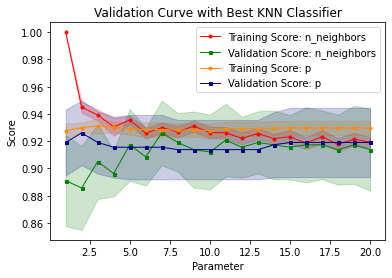

In [ ]:
x = bestDF
y = dfLabels
model = bestModel

fig = plt.figure()

for param in ['n_neighbors', 'p']:
  maxDepthRange = range(1, maxRange+1)
  trainScores, testScores = validation_curve(model, x, y, \
              param_name = param, param_range = maxDepthRange, \
              cv = kFolds, scoring = 'accuracy')
  trainScoresMean = np.mean(trainScores, axis=1)
  trainScoresStd = np.std(trainScores, axis=1)
  testScoresMean = np.mean(testScores, axis=1)
  testScoresStd = np.std(testScores, axis=1)

  if param == 'p':
      colors = ['darkorange', 'navy']
  else:
      colors = ['red', 'green']

  plt.plot(maxDepthRange, trainScoresMean, label = 'Training Score: ' + param, \
          color = colors[0], lw = 1, marker = 'o', markersize = 3)
  plt.fill_between(maxDepthRange, trainScoresMean - trainScoresStd, \
                  trainScoresMean + trainScoresStd, alpha = 0.2, \
                  color = colors[0], lw = 1)
  plt.plot(maxDepthRange, testScoresMean, label = 'Validation Score: ' + param, \
          color = colors[1], lw = 1, marker = 's', markersize = 3)
  plt.fill_between(maxDepthRange, testScoresMean - testScoresStd, \
                  testScoresMean + testScoresStd, alpha = 0.2, \
                  color = colors[1], lw = 1)

  '''
  plt.title("Validation Curve with Best KNN Classifier using " + param)
  plt.xlabel(param + ' Parameter')
  plt.ylabel("Score")
  plt.legend(loc="best")

  plt.show()
  fig.savefig('KNN Validation Curve ' + param + '.png')
  '''

plt.title("Validation Curve with Best KNN Classifier")
plt.xlabel('Parameter')
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()
fig.savefig('KNN Validation Curve.png')

scores = cross_val_score(model, x, y, cv = kFolds)
predicted = cross_val_predict(model, x, y, cv = kFolds)
accuracy = scores.mean()
confusion = confusion_matrix(y, predicted)
confDF = pd.DataFrame(confusion)
confDF.columns = labels
confDF.index = labels

fig, ax = plt.subplots() # figsize=(6,10)
plt.title('Confusion Matrix with Best Accuracy (KNN)')
ax = sns.heatmap(confDF, annot = True, square=True, linewidth=3)
fig.savefig('Best Heatmap KNN.png')
plt.close()



bestDF:      compactness_mean  concavity_mean  concave points_mean
0             0.27760         0.30010              0.14710
1             0.07864         0.08690              0.07017
2             0.15990         0.19740              0.12790
3             0.28390         0.24140              0.10520
4             0.13280         0.19800              0.10430
..                ...             ...                  ...
564           0.11590         0.24390              0.13890
565           0.10340         0.14400              0.09791
566           0.10230         0.09251              0.05302
567           0.27700         0.35140              0.15200
568           0.04362         0.00000              0.00000

[569 rows x 3 columns]
[[0.2776  0.3001  0.1471 ]
 [0.07864 0.0869  0.07017]
 [0.1599  0.1974  0.1279 ]
 ...
 [0.1023  0.09251 0.05302]
 [0.277   0.3514  0.152  ]
 [0.04362 0.      0.     ]]
Components using Scikit-learn =
[2.38255622 0.51573452]
[[ 0.49364861  0.78971661  0.3642234

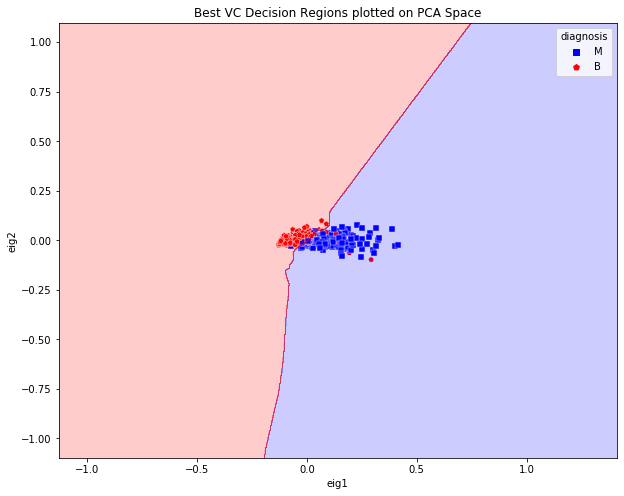

In [25]:
#PCA Analysis
pca = PCA(n_components = 2)
print("bestDF:", bestDF)
x = bestDF.values
print(x)
pca.fit(x)
print('Components using Scikit-learn =')
print(pca.singular_values_)
print(pca.components_)
xP = pca.transform(x)
currentDFPCA = pd.DataFrame(data = xP, columns = ['eig1', 'eig2'])

#print(dfLabels)
X = currentDFPCA
Y = dfLabels # Labels

# Plotting decision regions
X = X.to_numpy()
#print("X:", X)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #Compute boundaries of painting space
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/1000),
                    np.arange(y_min, y_max, (y_max-y_min)/1000)) #tesselation 0.1 - resolution


f, ax = plt.subplots(figsize=(10, 8))
print(np.c_[xx.ravel(), yy.ravel()].shape)
model.fit(bestDF,dfLabels)
Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])) # Predicting after inversing the PCA
Z = Z.reshape(xx.shape)

# Defining the colors to use
colors=['blue', 'red']
markers = ['s', 'p']
cmap = ListedColormap(colors)

currentDFPCA['diagnosis'] = diagnosis

# Plotting
#print(currentDFPCA.head())
ax = sns.scatterplot(data=currentDFPCA, x='eig1', y='eig2', hue = "diagnosis", palette=colors, style="diagnosis", markers=markers)
ax.contourf(xx, yy, Z, alpha=0.2, cmap=cmap) # Paint between boarders
ax.set_title('Best VC Decision Regions plotted on PCA Space')
plt.show()
f.savefig("Decision Regions for VC")